In [5]:
#importing necessary libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Reading the Dataset
data = pd.read_csv("/content/Airline_Reviews.csv")
print(data.head())

   Unnamed: 0   Airline Name Overall_Rating  \
0           0    AB Aviation              9   
1           1    AB Aviation              1   
2           2    AB Aviation              1   
3           3  Adria Airways              1   
4           4  Adria Airways              1   

                            Review_Title          Review Date  Verified  \
0                "pretty decent airline"   11th November 2019      True   
1                   "Not a good airline"       25th June 2019      True   
2         "flight was fortunately short"       25th June 2019      True   
3    "I will never fly again with Adria"  28th September 2019     False   
4  "it ruined our last days of holidays"  24th September 2019      True   

                                              Review       Aircraft  \
0    Moroni to Moheli. Turned out to be a pretty ...            NaN   
1   Moroni to Anjouan. It is a very small airline...           E120   
2    Anjouan to Dzaoudzi. A very small airline an... 

In [7]:
data.shape

(23171, 20)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [9]:
#checking for the null values in the dataset
data.isnull().sum()

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64

In [10]:
#drop columns that are not relevant to our project
data = data.drop(["Wifi & Connectivity","Aircraft","Value For Money","Inflight Entertainment","Review","Review_Title","Unnamed: 0","Review Date","Cabin Staff Service"], axis=1)

In [11]:
print(data.columns)

Index(['Airline Name', 'Overall_Rating', 'Verified', 'Type Of Traveller',
       'Seat Type', 'Route', 'Date Flown', 'Seat Comfort', 'Food & Beverages',
       'Ground Service', 'Recommended'],
      dtype='object')


In [12]:
#Now checking the presence of unnecessary values in the above columns.
for i in data.columns :
  print(i," ",data[i].value_counts(),end = "\n\n")

Airline Name   Caribbean Airlines           100
GoAir                        100
Germanwings                  100
Philippine Airlines          100
Bangkok Airways              100
                            ... 
JC International Airlines      1
MEGA Maldives Airlines         1
MAYAir                         1
Tibet Airlines                 1
Dimonim Air                    1
Name: Airline Name, Length: 497, dtype: int64

Overall_Rating   1    11595
2     2296
9     1768
8     1757
3     1356
7     1192
4      859
n      842
5      830
6      676
Name: Overall_Rating, dtype: int64

Verified   True     12322
False    10849
Name: Verified, dtype: int64

Type Of Traveller   Solo Leisure      7120
Couple Leisure    5265
Family Leisure    4352
Business          2696
Name: Type Of Traveller, dtype: int64

Seat Type   Economy Class      19145
Business Class      2098
Premium Economy      646
First Class          186
Name: Seat Type, dtype: int64

Route   Melbourne to Sydney                    

In [13]:
#removing unnecessary values from the column Overall_Rating
data.Overall_Rating = data.Overall_Rating.replace(['1','2','3','4','5','6','7','8','9','n'],['1','2','3','4','5','6','7','8','9','10'])


In [14]:
print(data.Overall_Rating.value_counts())

1     11595
2      2296
9      1768
8      1757
3      1356
7      1192
4       859
10      842
5       830
6       676
Name: Overall_Rating, dtype: int64


In [15]:
#dealing with null values by replacing them with the mode for categorical and median for numerical columns
data["Type Of Traveller"]=data['Type Of Traveller'].fillna(data['Type Of Traveller'].mode()[0])

In [16]:
data["Seat Type"]=data['Seat Type'].fillna(data['Seat Type'].mode()[0])

In [17]:
data["Seat Comfort"]=data['Seat Comfort'].fillna(data['Seat Comfort'].mode()[0])

In [18]:
data["Ground Service"]=data['Ground Service'].fillna(data['Ground Service'].mode()[0])

In [19]:
data["Food & Beverages"]=data['Food & Beverages'].fillna(data['Food & Beverages'].mode()[0])

In [20]:
data["Route"]=data['Route'].fillna(data['Route'].mode()[0])

In [21]:
data["Date Flown"]=data['Date Flown'].fillna(data['Date Flown'].mode()[0])

In [22]:
# Spliting the date flown colunm into month and year
data[['Month Flown','Year Flown']]=data['Date Flown'].str.split(expand=True)

In [23]:
print( data[['Month Flown','Year Flown']])

      Month Flown Year Flown
0        November       2019
1            June       2019
2            June       2019
3       September       2019
4       September       2019
...           ...        ...
23166        June       2022
23167        June       2022
23168         May       2022
23169         May       2022
23170         May       2022

[23171 rows x 2 columns]


In [24]:
print(data.Route)

0                        Moroni to Moheli
1                       Moroni to Anjouan
2                     Anjouan to Dzaoudzi
3                   Frankfurt to Pristina
4        Sofia to Amsterdam via Ljubljana
                       ...               
23166                    Bangkok to Tokyo
23167                  Singapore to Tokyo
23168                    Bangkok to Tokyo
23169                Tokyo to Los Angeles
23170                  Singapore to Tokyo
Name: Route, Length: 23171, dtype: object


In [25]:
#Similarly splitting the route parameter into origin and destination
data['Origin'] = data.Route.str.split('to',expand=True)[0]
data['Destination']=data.Route.str.split('to',expand=True)[1]
# some routes have in between stopping points as well which are written after via
data['Destination']=data.Destination.str.split('via',expand=True)[0]

In [26]:
print(data.Origin)

0           Moroni 
1           Moroni 
2          Anjouan 
3        Frankfurt 
4            Sofia 
            ...    
23166      Bangkok 
23167    Singapore 
23168      Bangkok 
23169        Tokyo 
23170    Singapore 
Name: Origin, Length: 23171, dtype: object


In [27]:
print(data.Destination)

0              Moheli
1             Anjouan
2            Dzaoudzi
3            Pristina
4          Amsterdam 
             ...     
23166           Tokyo
23167           Tokyo
23168           Tokyo
23169     Los Angeles
23170           Tokyo
Name: Destination, Length: 23171, dtype: object


In [28]:
# remove the date flown and route column
del data['Route']
del data['Date Flown']

In [29]:
for i in range(0,len(data.Origin.unique())):
  print(data.Origin.unique()[i])

Moroni 
Anjouan 
Frankfurt 
Sofia 
Sarajevo 
Ljubljana 
Timisoara 
Pristina 
Zurich 
Vienna 
Paris 
LJU 
CDG 
MUC 
MAN 
LGW 
TLL 
ZRH 
LCJ 
SKP 
Manchester 
Melbourne 
Heraklion 
S
Athens 
Barcelona 
San
Munich 
London 
Cairo 
Malaga 
Rhodes 
Rome 
Mytilini 
Tirana 
Prague 
Belgrade 
Corfu 
Brussels 
Tel Aviv 
Madrid 
Larnaca 
Yerevan 
Oslo 
Helsinki 
Tbislis 
Berlin 
Stuttgart 
Mykonos 
Thessaloniki 
Istanbul 
Dublin 
Hamburg 
Naples 
Seattle 
Alicante 
Southamp
Edinburgh 
Chicago 
Bos
Cork 
New York 
Washing
New York JFK 
Orlando 
London Heathrow 
San Francisco 
Los Angeles 
Toron
Hartford 
Gatwick 
Belfast City 
Philadelphia 
Birmingham 
Geneva 
Santiago de Compostela 
Belfast 
Chicago O'Hare 
Cascais 
Bragança 
Funchal 
Osaka 
Vladivos
Moscow 
Miami 
Petropavlovsk-Kamchatsky 
Delhi 
Riga 
Hanoi 
Vilnius 
Hong Kong 
Lyon 
Bucharest 
Phuket 
Amsterdam 
Irkutsk 
Ho Chi Minh 
Warsaw 
Moscow SVO 
St Petersburg 
Ho Chi Minh City 
Seoul 
Barnaul 
Kazan 
Lisbon 
Bangkok 
Almaty 
Samara 
Pe

In [30]:
#recoreections in origin
data['Origin']=data.Origin.replace(['Hong Kong To Shanghai','Edinburgh To Fuerteventura','London Gatwick - Bangkok'
,'Cardiff-Malta return','KIV-LIS','GRR-ORD','LCY-FRA','NAP-RMF return','LEB-BOS','Bucharest-Brussels'
,'Da Nang - Hong Kong','New-York','LHR-DXB','Dublin - Charlotte','Kansas City via Dallas Ft Worth',
'Sydney via Singapore','Geneva via Brussels','Nursultan via Dubai','Denpasar Medan via Jakarta'
,'Auckland Denpasar via Sydney / Melbourne','Lima via Santiago','Manila via Los Angeles'
,'Dar es Salaam via Kigali','Singapore via Sydney','Bangkok via Mumbai','A Coruna via Bilbao'
,'LHR-DXB ','Paris Orly  Los Angeles','NEwark Los Angeles','Honolulu Seattle','San {Paulo'],
 ['Hong Kong','Edinburgh','London Gatwick','Cardiff','KIV','GRR','LCY','NAP','LEB','Bucharest'
 ,'Da Nang','New York','LHR','Dublin','Kansas City','Sydney','Geneva','Nursultan','Denpasar Medan'
 ,'Auckland Denpasar','Lima','Manila','Dar es Salaam','Singapore','Bangkok'
 ,'A Coruna','LHR','Paris Orly',"Newark",'Honolulu','San Paulo'])

In [31]:
#Recorrections in Destination
i=0
row = [2172,3788,5112,5368,7000,8314,9107,10589,12993,17759,20572,20930,2225,2380,4339,5182,
       5785,6382,10991,12573,17051,21497,4293,6215,9787,10207,12372,13556,16022,17217,17732,18774,
       19462,20112,22449,11584,10001,12258,10886]
des_new = ["Malta","Chennai","TLV","Bangkok","Shanghai","Fuerteventura","Hamburg","Jaipur","New York"
, "Bangkok","MFM","Yogyakarta","Malta","LIS","ORd","FRA","RMF","BOS","Brussels","Hong Kong"
,"DXB","Charlotte","Dallas Ft Worth","Brussels","Dubai","Jakarta","Sydney / Melbourne","Santaigo"
,"Los Angeles","Kigali","Sydney","Chicago","Varadero","Mumbai","Bilbao","Dallas","Los Angeles","Los Angeles"
,"Seattle"]
for k in row :
  data.at[k,"Destination"]=des_new[i]
  i+=1

In [32]:
#Encoding Categorical Valaues using label encoding
from sklearn.preprocessing import LabelEncoder

In [33]:
print(data['Airline Name'].unique())

['AB Aviation' 'Adria Airways' 'Aegean Airlines' 'Aer Lingus' 'Aero VIP'
 'Aerocaribbean' 'Aeroflot Russian Airlines' 'AeroItalia'
 'Aerolineas Argentinas' 'Aeromar' 'Aeromexico' 'Aerosur'
 'Africa World Airlines' 'Afriqiyah Airways' 'Aigle Azur' 'Air Algerie'
 'Air Antilles' 'Air Arabia' 'Air Astana' 'Air Austral' 'Air Bagan'
 'Air Berlin' 'Air Botswana' 'Air Burkina' 'Air Busan' 'Air Cairo'
 'Air Canada' 'Air Canada rouge' 'Air Caraibes' 'Air China' 'Air Corsica'
 'Air Costa' "Air Cote d'Ivoire" 'Air Djibouti' 'Air Dolomiti'
 'Air Europa' 'Air France' 'Air Greenland' 'Air Iceland Connect'
 'Air India' 'Air India Express' 'Air Italy' 'Air Juan' 'Air KBZ'
 'Air Koryo' 'Air Labrador' 'Air Macau' 'Air Madagascar' 'Air Malawi'
 'Air Malta' 'Air Mauritius' 'Air Mediterranee' 'Air Memphis'
 'Air Moldova' 'Air Namibia' 'Air New Zealand' 'Air Niugini'
 "Air North Yukon's Airline" 'Air Nostrum' 'Air Panama' 'Air Pegasus'
 'Air Rarotonga' 'Air Serbia' 'Air Seychelles' 'Air Tahiti Nui'
 'Air Tan

In [34]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
le7=LabelEncoder()
le8=LabelEncoder()
le9=LabelEncoder()
le10=LabelEncoder()


In [35]:
data['Airline Name'] = le1.fit_transform(data['Airline Name'])
data['Seat Type']=le2.fit_transform(data['Seat Type'])
data['Type Of Traveller']=le3.fit_transform(data['Type Of Traveller'])
data['Origin']=le4.fit_transform(data['Origin'])
data['Destination']=le5.fit_transform(data['Destination'])
data['Month Flown']=le6.fit_transform(data['Month Flown'])
data['Year Flown']=le7.fit_transform(data['Year Flown'])
data['Verified']=le8.fit_transform(data['Verified'])
data['Overall_Rating']=le9.fit_transform(data['Overall_Rating'])
data.Recommended = le10.fit_transform(data.Recommended)

In [36]:
data.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Seat Comfort,Food & Beverages,Ground Service,Recommended,Month Flown,Year Flown,Origin,Destination
0,0,9,1,3,1,4.0,4.0,4.0,1,9,6,1284,1736
1,0,0,1,3,1,2.0,1.0,1.0,0,6,6,1284,124
2,0,0,1,3,1,2.0,1.0,1.0,0,6,6,80,766
3,4,0,0,3,1,1.0,1.0,1.0,0,11,6,633,2150
4,4,0,1,1,1,1.0,1.0,1.0,0,11,6,1832,117


In [37]:
#Analyzing the data
data.describe() #5 point analysis

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Seat Comfort,Food & Beverages,Ground Service,Recommended,Month Flown,Year Flown,Origin,Destination
count,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000
mean,245.027880,2.565966,0.531785,2.008675,0.973242,2.328126,1.972207,2.073713,0.336930,5.495188,7.705321,1078.377325,1634.943895
std,144.313766,3.235551,0.498999,1.077595,0.457584,1.465062,1.422340,1.523264,0.472671,3.019861,2.512480,557.867506,912.517096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,6.000000,620.000000,792.500000
50%,237.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,6.000000,9.000000,1234.000000,1703.000000
75%,373.000000,5.000000,1.000000,3.000000,1.000000,4.000000,3.000000,3.000000,1.000000,7.000000,10.000000,1413.000000,2582.000000
max,496.000000,9.000000,1.000000,3.000000,3.000000,5.000000,5.000000,5.000000,1.000000,11.000000,10.000000,2155.000000,3032.000000


[Text(0.5, 0, 'index')]

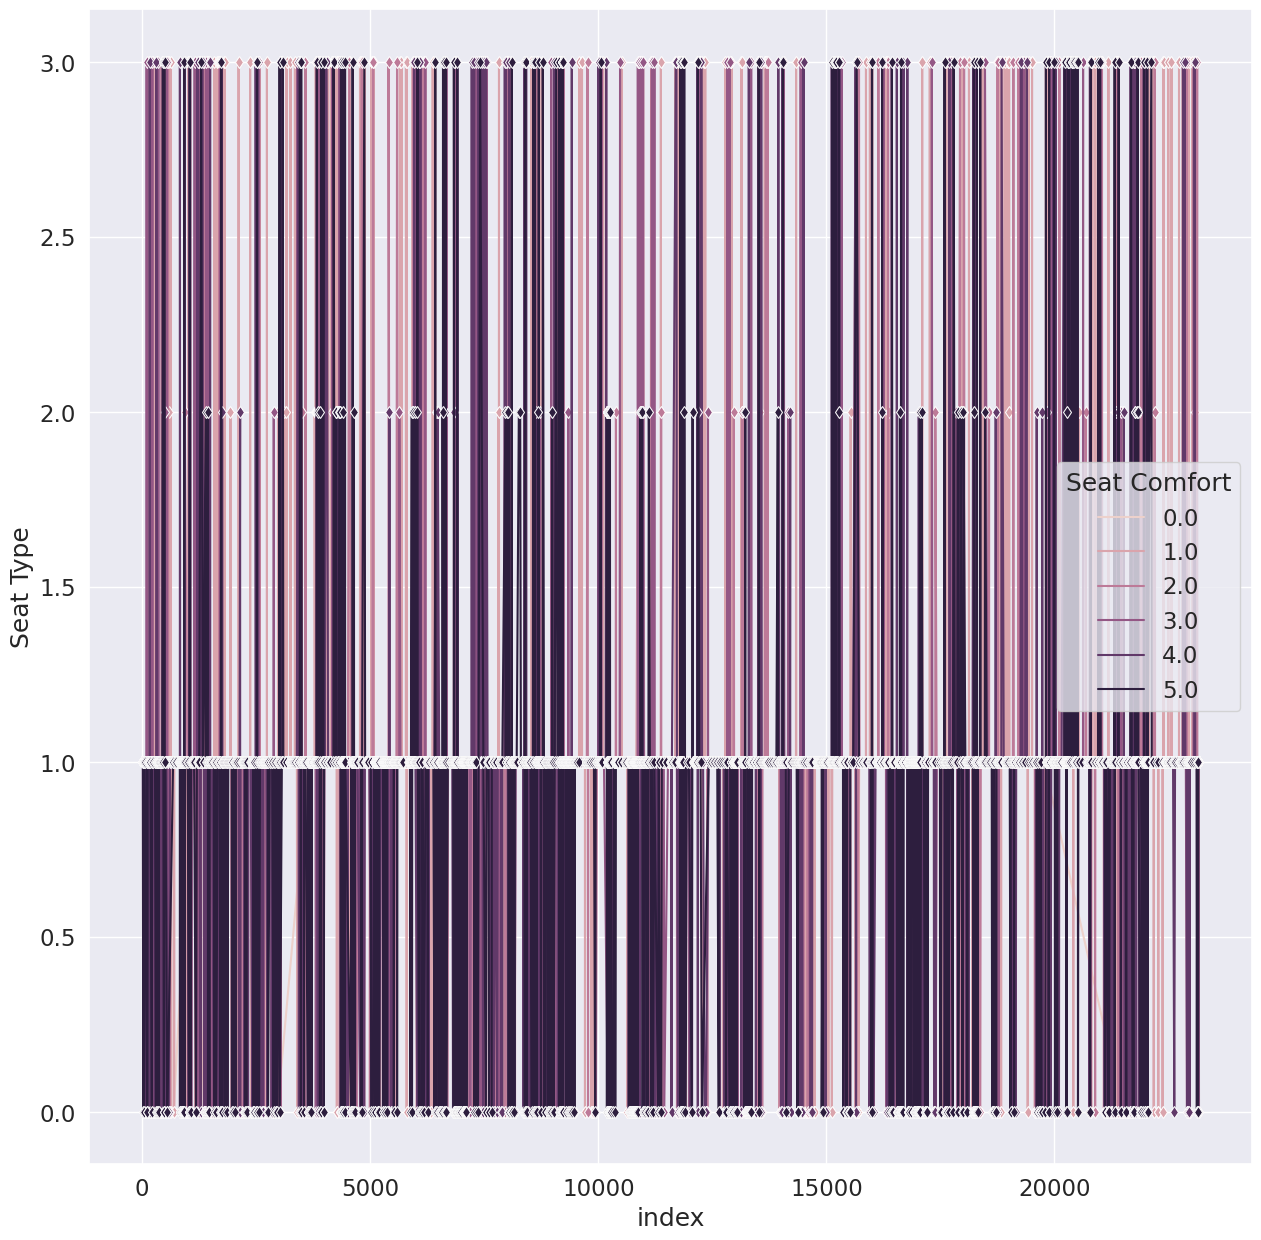

In [38]:
# Line plot
sns.set(rc={'figure.figsize':[15,15]})
sns.set(font_scale=1.5)
fig = sns.lineplot(x=data.index,y=data['Seat Type'],markevery=1,marker='d',hue=data['Seat Comfort'])
fig.set(xlabel='index')

<Axes: xlabel='Type Of Traveller', ylabel='Overall_Rating'>

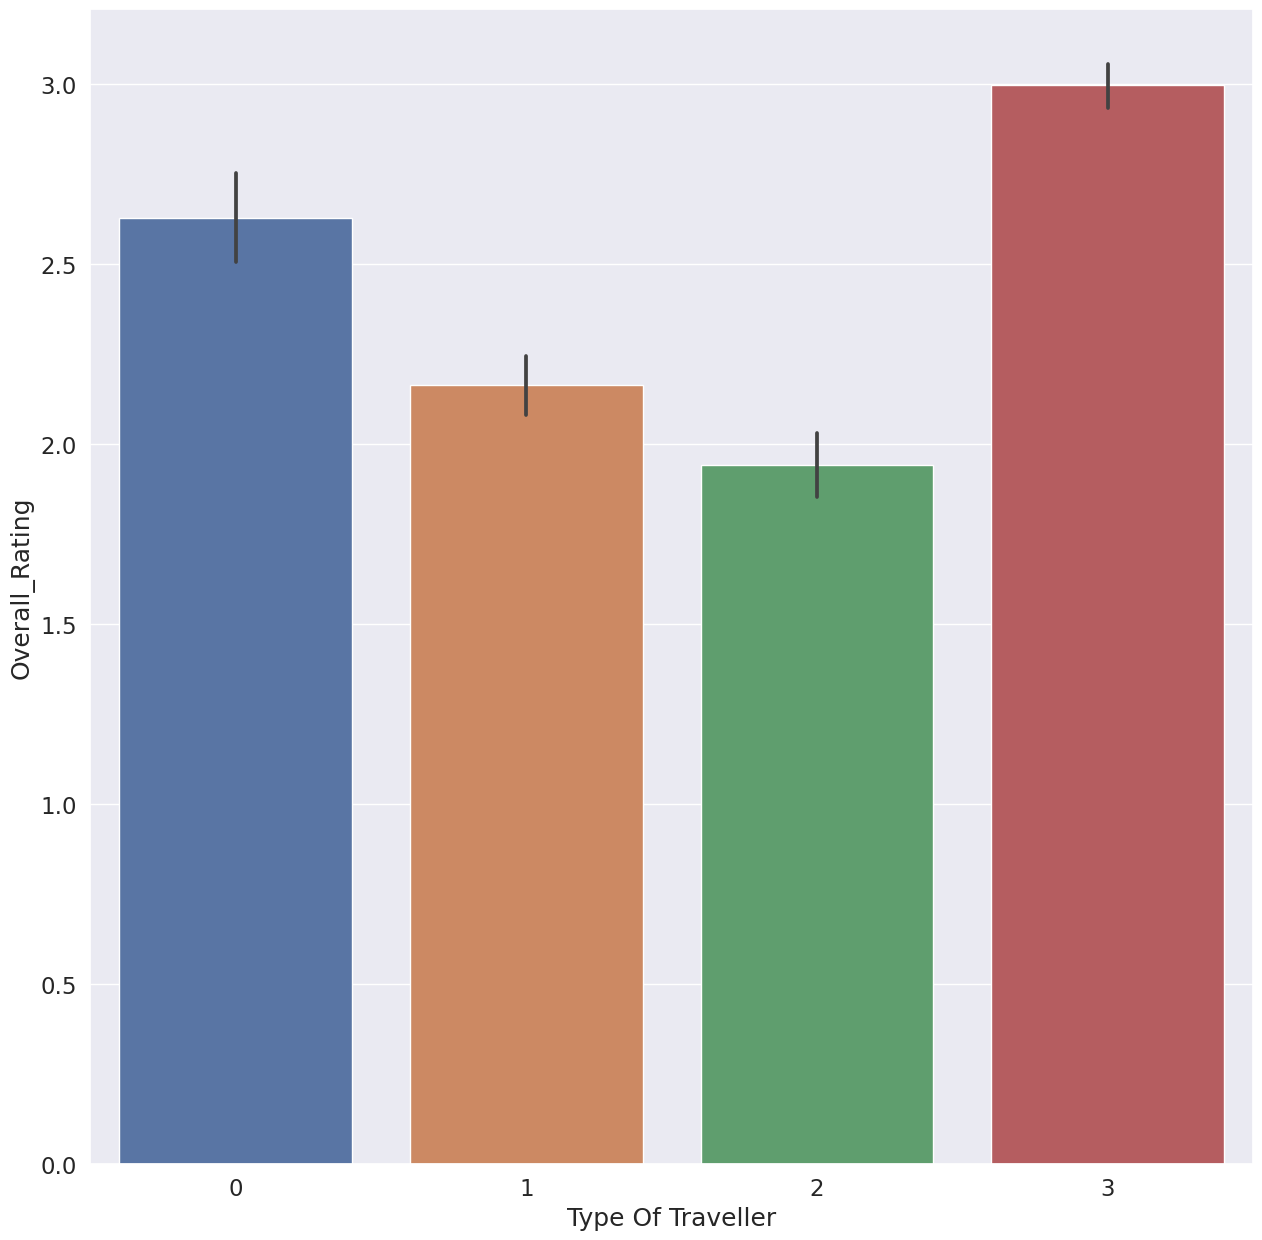

In [39]:
sns.barplot(x=data['Type Of Traveller'],y=data['Overall_Rating'])

<Axes: >

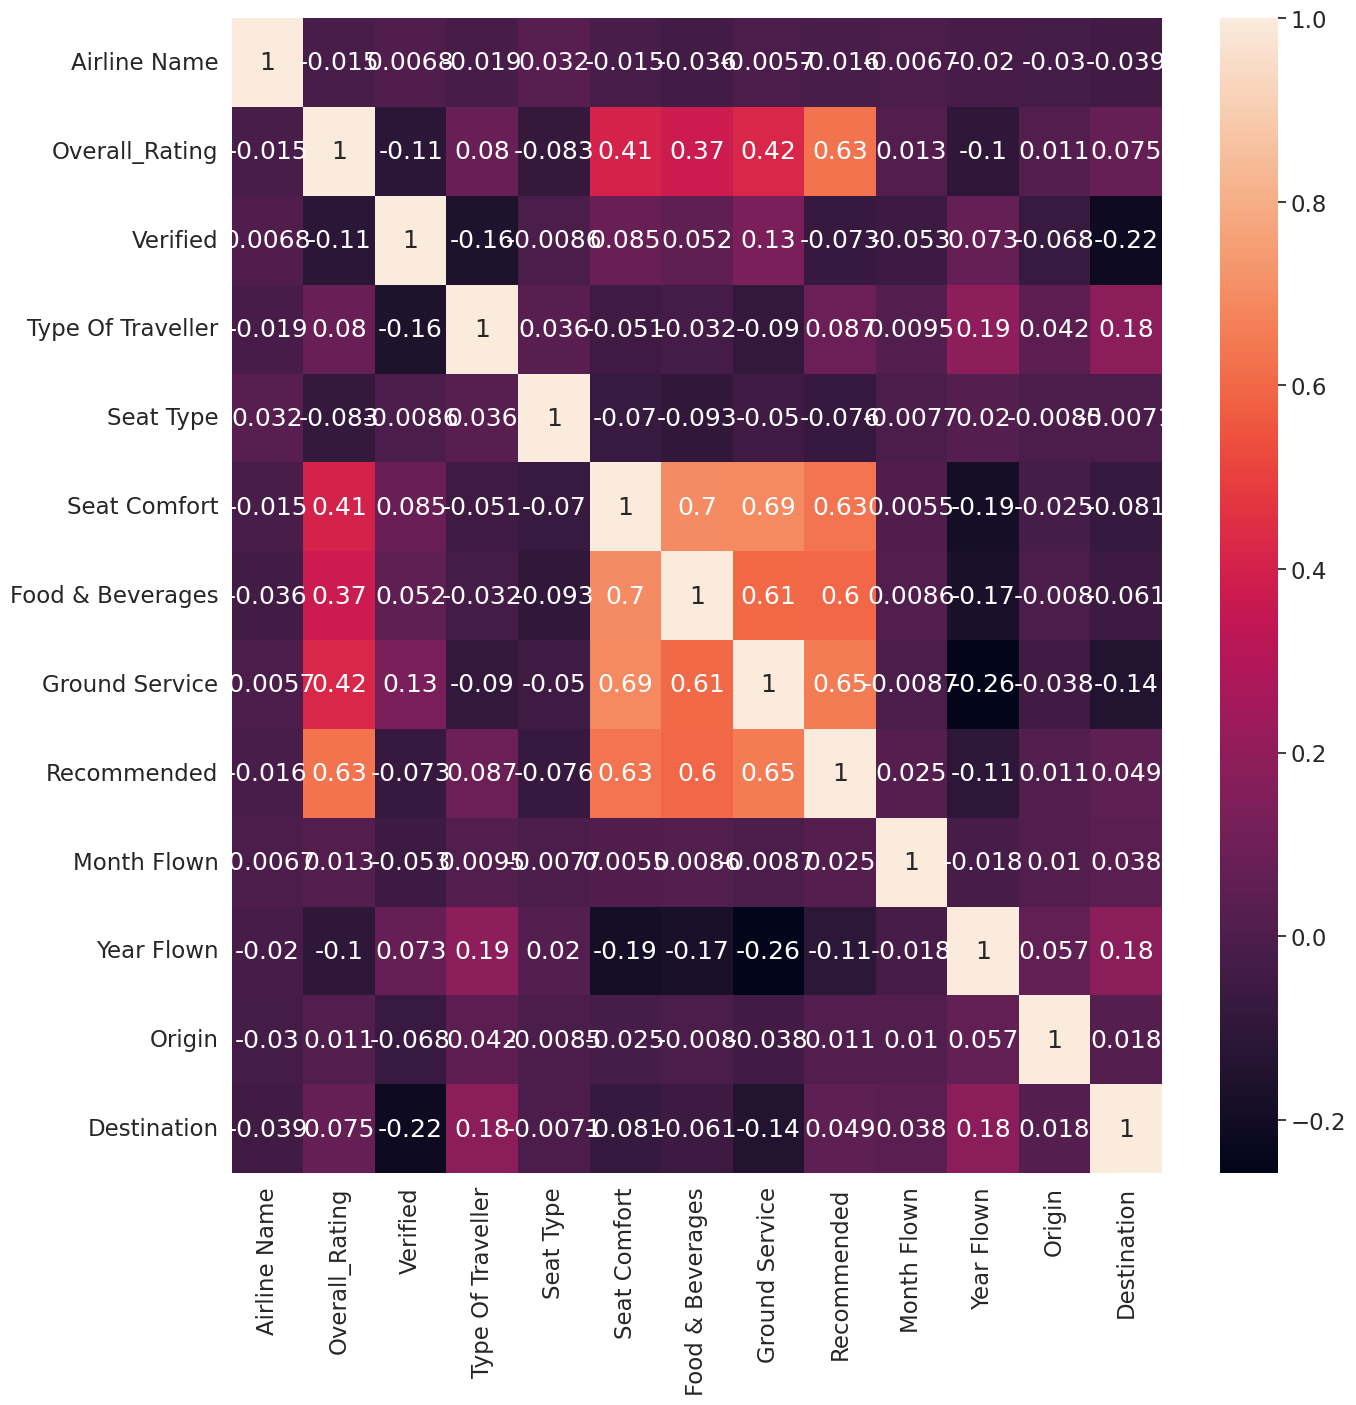

In [40]:
sns.heatmap(data.corr(),annot=True)

In [41]:
data=data.reindex(columns=['Airline Name','Seat Type','Type Of Traveller','Origin','Destination'
,'Month Flown','Year Flown','Verified','Seat Comfort','Food & Beverages','Ground Service','Overall_Rating','Recommended'])

In [42]:
print(data.head())

   Airline Name  Seat Type  Type Of Traveller  Origin  Destination  \
0             0          1                  3    1284         1736   
1             0          1                  3    1284          124   
2             0          1                  3      80          766   
3             4          1                  3     633         2150   
4             4          1                  1    1832          117   

   Month Flown  Year Flown  Verified  Seat Comfort  Food & Beverages  \
0            9           6         1           4.0               4.0   
1            6           6         1           2.0               1.0   
2            6           6         1           2.0               1.0   
3           11           6         0           1.0               1.0   
4           11           6         1           1.0               1.0   

   Ground Service  Overall_Rating  Recommended  
0             4.0               9            1  
1             1.0               0            0  

##Model Building

In [43]:
x = data.iloc[:,0:12].values
y=data.iloc[:,12:13].values

In [44]:
print(x)

[[  0.   1.   3. ...   4.   4.   9.]
 [  0.   1.   3. ...   1.   1.   0.]
 [  0.   1.   3. ...   1.   1.   0.]
 ...
 [487.   1.   0. ...   2.   1.   3.]
 [487.   0.   0. ...   3.   1.   6.]
 [487.   1.   3. ...   1.   1.   0.]]


In [45]:
print(y)

[[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [46]:
data['Recommended'].value_counts()

0    15364
1     7807
Name: Recommended, dtype: int64

In [47]:
#Oversampling is there so reoving it using smote
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='auto',random_state=50)

In [48]:
x,y=sm.fit_resample(x,y)

In [49]:
np.count_nonzero(y==1)

15364

In [50]:
np.count_nonzero(y==0)

15364

In [51]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [52]:
#scaling the data
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

In [53]:
# saving the model in pkl file
import pickle
pickle.dump(s,open('ar_ss.pkl','wb'))

##Decision Tree Model

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=10)

In [55]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [56]:
pred_dt = dt.predict(x_test)

In [57]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc
fpr_dt, tpr_dt,thresh_dt = roc_curve(y_test,pred_dt)

print(classification_report(y_test,pred_dt))


              precision    recall  f1-score   support

           0       0.97      0.82      0.89      3067
           1       0.85      0.98      0.91      3079

    accuracy                           0.90      6146
   macro avg       0.91      0.90      0.90      6146
weighted avg       0.91      0.90      0.90      6146



In [58]:

roc_auc_dt = auc(fpr_dt,tpr_dt)
print("ROC AUC : ",roc_auc_dt)


ROC AUC :  0.8991334378801971


In [59]:
cm_dt = confusion_matrix(y_test,pred_dt)
print("Confusion matrix : ",cm_dt)
as_dt = accuracy_score(y_test,pred_dt)
print("Accuracy score : ",as_dt)

Confusion matrix :  [[2521  546]
 [  73 3006]]
Accuracy score :  0.8992840872111942


##K-Nearest Neighbors

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=5)

In [62]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
pred_knn = knn.predict(x_test)

In [64]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc
fpr_knn, tpr_knn,thresh_knn = roc_curve(y_test,pred_knn)

print(classification_report(y_test,pred_knn))
roc_auc_knn = auc(fpr_knn,tpr_knn)
print("ROC AUC : ",roc_auc_knn)
cm_knn = confusion_matrix(y_test,pred_knn)
print("Confusion matrix : ",cm_knn)
as_knn = accuracy_score(y_test,pred_knn)
print("Accuracy score : ",as_knn)


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3067
           1       0.93      0.95      0.94      3079

    accuracy                           0.94      6146
   macro avg       0.94      0.94      0.94      6146
weighted avg       0.94      0.94      0.94      6146

ROC AUC :  0.9397802228523462
Confusion matrix :  [[2854  213]
 [ 157 2922]]
Accuracy score :  0.9397982427595184


##Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()

In [67]:
lr.fit(x_train,y_train)

LogisticRegression()

In [68]:
pred_lr = lr.predict(x_test)
print(pred_lr)

[1 0 0 ... 1 1 1]


In [69]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc
fpr_lr, tpr_lr,thresh_lr = roc_curve(y_test,pred_lr)

print(classification_report(y_test,pred_lr))
roc_auc_lr = auc(fpr_lr,tpr_lr)
print("ROC AUC : ",roc_auc_lr)
cm_lr = confusion_matrix(y_test,pred_lr)
print("Confusion matrix : ",cm_lr)
as_lr = accuracy_score(y_test,pred_lr)
print("Accuracy score : ",as_lr)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3067
           1       0.92      0.93      0.92      3079

    accuracy                           0.92      6146
   macro avg       0.92      0.92      0.92      6146
weighted avg       0.92      0.92      0.92      6146

ROC AUC :  0.9223745890337195
Confusion matrix :  [[2807  260]
 [ 217 2862]]
Accuracy score :  0.9223885453953791


##Naive Bayes Classification

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
gnb=GaussianNB()

In [72]:
gnb.fit(x_train,y_train)

GaussianNB()

In [73]:
pred_gnb=gnb.predict(x_test)

In [74]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc
fpr_gnb, tpr_gnb,thresh_gnb = roc_curve(y_test,pred_gnb)

print(classification_report(y_test,pred_gnb))
roc_auc_gnb = auc(fpr_gnb,tpr_gnb)
print("ROC AUC : ",roc_auc_gnb)
cm_gnb = confusion_matrix(y_test,pred_gnb)
print("Confusion matrix : ",cm_gnb)
as_gnb = accuracy_score(y_test,pred_gnb)
print("Accuracy score : ",as_gnb)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      3067
           1       0.89      0.94      0.91      3079

    accuracy                           0.91      6146
   macro avg       0.91      0.91      0.91      6146
weighted avg       0.91      0.91      0.91      6146

ROC AUC :  0.9083384895502025
Confusion matrix :  [[2696  371]
 [ 192 2887]]
Accuracy score :  0.9083957045232671


##Random Forest Classification

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=10)

In [77]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)

In [78]:
pred_rfc = rfc.predict(x_test)

In [79]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc
fpr_rfc, tpr_rfc,thresh_rfc = roc_curve(y_test,pred_rfc)

print(classification_report(y_test,pred_gnb))
roc_auc_rfc = auc(fpr_rfc,tpr_rfc)
print("ROC AUC : ",roc_auc_rfc)
cm_rfc = confusion_matrix(y_test,pred_rfc)
print("Confusion matrix : ",cm_rfc)
as_rfc = accuracy_score(y_test,pred_rfc)
print("Accuracy score : ",as_rfc)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      3067
           1       0.89      0.94      0.91      3079

    accuracy                           0.91      6146
   macro avg       0.91      0.91      0.91      6146
weighted avg       0.91      0.91      0.91      6146

ROC AUC :  0.9342354409632319
Confusion matrix :  [[2817  250]
 [ 154 2925]]
Accuracy score :  0.9342661893914741


##SVM

In [80]:
from sklearn.svm import SVC

In [81]:
svc = SVC()

In [82]:
svc.fit(x_train,y_train)

SVC()

In [83]:
pred_svc = svc.predict(x_test)

In [84]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc
fpr_svc, tpr_svc,thresh_svc = roc_curve(y_test,pred_svc)

print(classification_report(y_test,pred_gnb))
roc_auc_svc = auc(fpr_svc,tpr_svc)
print("ROC AUC : ",roc_auc_svc)
cm_svc = confusion_matrix(y_test,pred_svc)
print("Confusion matrix : ",cm_svc)
as_svc = accuracy_score(y_test,pred_svc)
print("Accuracy score : ",as_svc)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      3067
           1       0.89      0.94      0.91      3079

    accuracy                           0.91      6146
   macro avg       0.91      0.91      0.91      6146
weighted avg       0.91      0.91      0.91      6146

ROC AUC :  0.9407977704387654
Confusion matrix :  [[2922  145]
 [ 219 2860]]
Accuracy score :  0.9407744874715261


##XGBoost Classifier

In [85]:
from xgboost import XGBClassifier

In [86]:
xgb = XGBClassifier()

In [87]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
pred_xgb = xgb.predict(x_test)

In [89]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc
fpr_xgb, tpr_xgb,thresh_xgb = roc_curve(y_test,pred_xgb)

print(classification_report(y_test,pred_xgb))
roc_auc_xgb = auc(fpr_xgb,tpr_xgb)
print("ROC AUC : ",roc_auc_xgb)
cm_xgb = confusion_matrix(y_test,pred_xgb)
print("Confusion matrix : ",cm_xgb)
as_xgb = accuracy_score(y_test,pred_xgb)
print("Accuracy score : ",as_xgb)

              precision    recall  f1-score   support

           0       0.99      0.45      0.62      3067
           1       0.64      1.00      0.78      3079

    accuracy                           0.72      6146
   macro avg       0.82      0.72      0.70      6146
weighted avg       0.82      0.72      0.70      6146

ROC AUC :  0.7225396903389527
Confusion matrix :  [[1380 1687]
 [  15 3064]]
Accuracy score :  0.7230719166937846


## Choosing the model that gives better evaluation results

In [90]:
data_frame = pd.DataFrame({"Model":['Decision Tree Classification',"K-Nearest Neighbors"
, "Logistic Regression","Naive Bayes Classification","Random Forest Classification"
, "Support Vector Machine","XGBClassifier"],
                           'roc_auc':[roc_auc_dt,roc_auc_knn,roc_auc_lr,roc_auc_gnb,roc_auc_rfc,roc_auc_svc,
                                      roc_auc_xgb,],
                           'accuracy':[as_dt,as_knn,as_lr,as_gnb,as_rfc,as_svc,as_xgb,]})

In [91]:
print(data_frame.head(7))

                          Model   roc_auc  accuracy
0  Decision Tree Classification  0.899133  0.899284
1           K-Nearest Neighbors  0.939780  0.939798
2           Logistic Regression  0.922375  0.922389
3    Naive Bayes Classification  0.908338  0.908396
4  Random Forest Classification  0.934235  0.934266
5        Support Vector Machine  0.940798  0.940774
6                 XGBClassifier  0.722540  0.723072


In [92]:
ma = 0
for i in range(len(data_frame['Model'])):
  if data_frame.iloc[i:i+1,1:2].values>ma:
    ma=data_frame.iloc[i:i+1,1:2].values
    model = data_frame.iloc[i:i+1,0:1].values
  else :
    pass

max_roc_aoc=0
for i in range(len(data_frame['Model'])):
  if data_frame.iloc[i:i+1,2:3].values>max_roc_aoc:
    max_roc_aoc=data_frame.iloc[i:i+1,2:3].values
    model1 = data_frame.iloc[i:i+1,0:1].values
  else :
    pass


print("Best Accuracy Score : ",ma,' given by ',model[0][0])
print("Best roc_auc : ",max_roc_aoc,' given by ',model1[0][0])

Best Accuracy Score :  [[0.94079777]]  given by  Support Vector Machine
Best roc_auc :  [[0.94077449]]  given by  Support Vector Machine


In [93]:
#Saving best model
import pickle
pickle.dump(svc,open('ar_svm.pkl','wb'))

In [94]:
import pickle
pickle.dump(le1,open('le1.pkl','wb'))
pickle.dump(le2,open('le2.pkl','wb'))
pickle.dump(le3,open('le3.pkl','wb'))
pickle.dump(le4,open('le4.pkl','wb'))
pickle.dump(le5,open('le5.pkl','wb'))
pickle.dump(le6,open('le6.pkl','wb'))
pickle.dump(le7,open('le7.pkl','wb'))
pickle.dump(le8,open('le8.pkl','wb'))
pickle.dump(le9,open('le9.pkl','wb'))
pickle.dump(le10,open('le10.pkl','wb'))

In [95]:
data1 = pd.read_csv("/content/Airline_Reviews.csv")


In [96]:
print(data1['Seat Type'].unique())

['Economy Class' 'Business Class' nan 'Premium Economy' 'First Class']


In [97]:
print(data1["Type Of Traveller"].unique())

['Solo Leisure' 'Couple Leisure' 'Business' 'Family Leisure' nan]


In [111]:
x=le1.transform([" Adria Airways "])
print(x)

[0]


In [100]:
reveiw = [le1.fit_transform(" Adria Airways ")[0],le2.fit_transform('Economy Class')[0],le3.transform('Couple Leisure')[0],le4.transform(' Hyderabad  ')[0],le5.transform("  Moheli ")[0],le6.transform("January")[0],le7.transform('2022')[0],le8.transform('True')[0],5,5,5,le9.transform('10')[0]]

ValueError: ignored